## Imports

In [2]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

plt.style.use('dark_background')

# Modeling

## Preprocess

In [29]:
from preprocess import X_indoor, y_indoor, X_sec_back_t, y_sec_back_t
from utils import fit_and_test, fit

## Trials

(1178, 15) (717, 15)
train score:	 0.7411421982913073
test score:	 0.2558113250661691

self RMSE:	 0.15640591250274757
pred RMSE:	 24.005581527789637
train RMSE:	 0.14089035389708193
test RMSE:	 0.149327859955762

self RMSE:	 0.15640591250274757
pred RMSE:	 0.10341684395466698
train RMSE:	 0.08027219384022231
test RMSE:	 0.13294363827498656



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=30, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

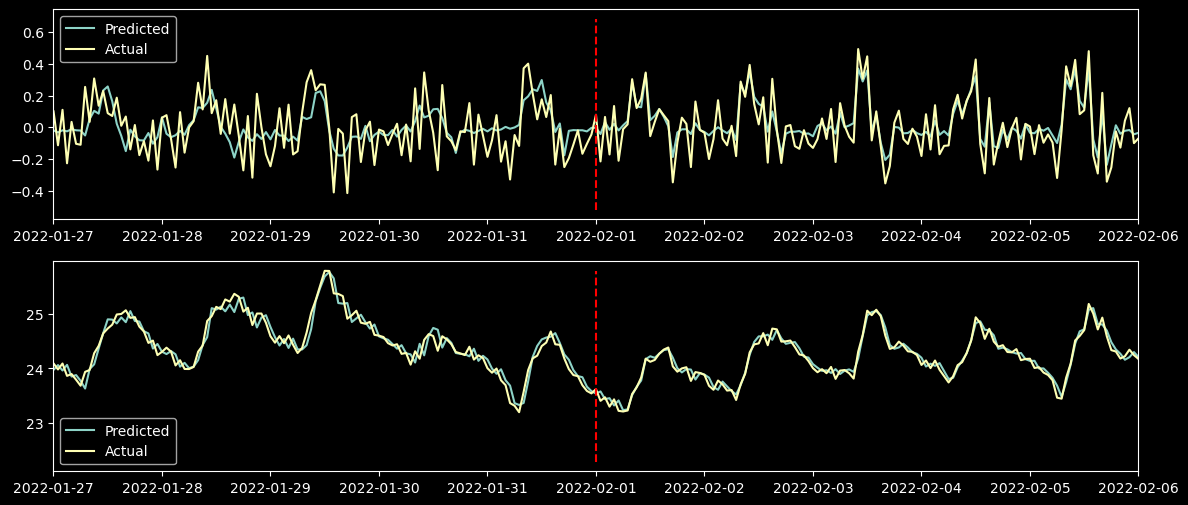

In [4]:
model_indoor = fit_and_test(XGBRegressor(
    n_estimators=30,
    learning_rate=0.1,
),
X_indoor, y_indoor)
model_indoor

(1178, 15) (717, 15)
train score:	 0.4653507004926395
test score:	 0.39970532301358963

self RMSE:	 0.15640591250274757
pred RMSE:	 24.029734155016413
train RMSE:	 0.1354033222376331
test RMSE:	 0.1447287976689261

self RMSE:	 0.15640591250274757
pred RMSE:	 0.11690564863331133
train RMSE:	 0.11535903321974807
test RMSE:	 0.11940108625205795



SVR(C=10)

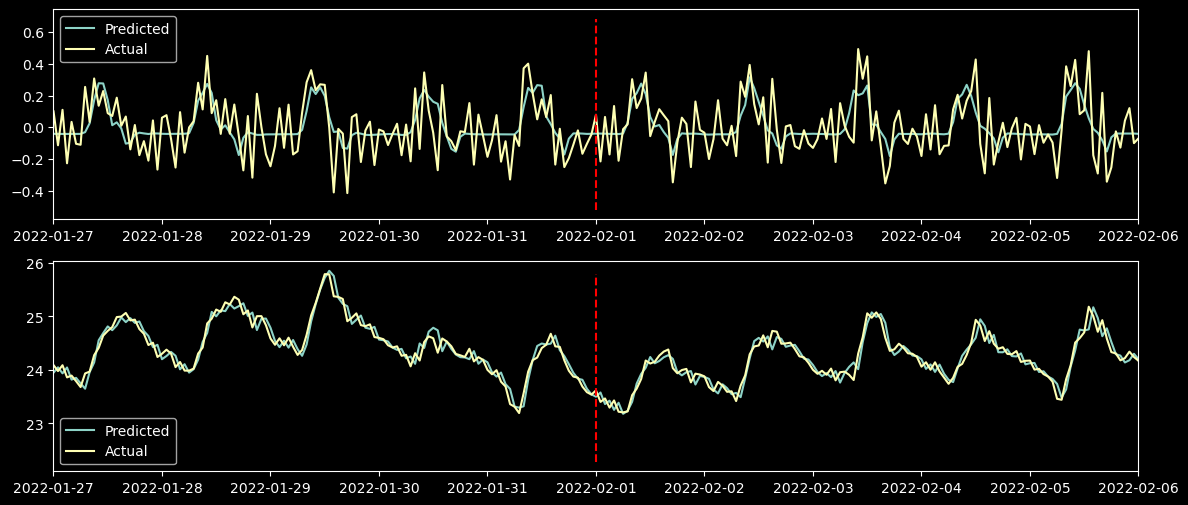

In [5]:
model_indoor = fit_and_test(SVR(kernel='rbf', C=10), X_indoor, y_indoor)
model_indoor

(1178, 15) (717, 15)
train score:	 0.440786368369971
test score:	 0.3336188801580071

self RMSE:	 0.15640591250274757
pred RMSE:	 24.052131548016757
train RMSE:	 0.13883627415714547
test RMSE:	 0.14503990142841697

self RMSE:	 0.15640591250274757
pred RMSE:	 0.12099909581004925
train RMSE:	 0.1179775185445931
test RMSE:	 0.12580195019170382



MLPRegressor(hidden_layer_sizes=(32, 128, 512, 1024, 256),
             learning_rate_init=0.01, random_state=42)

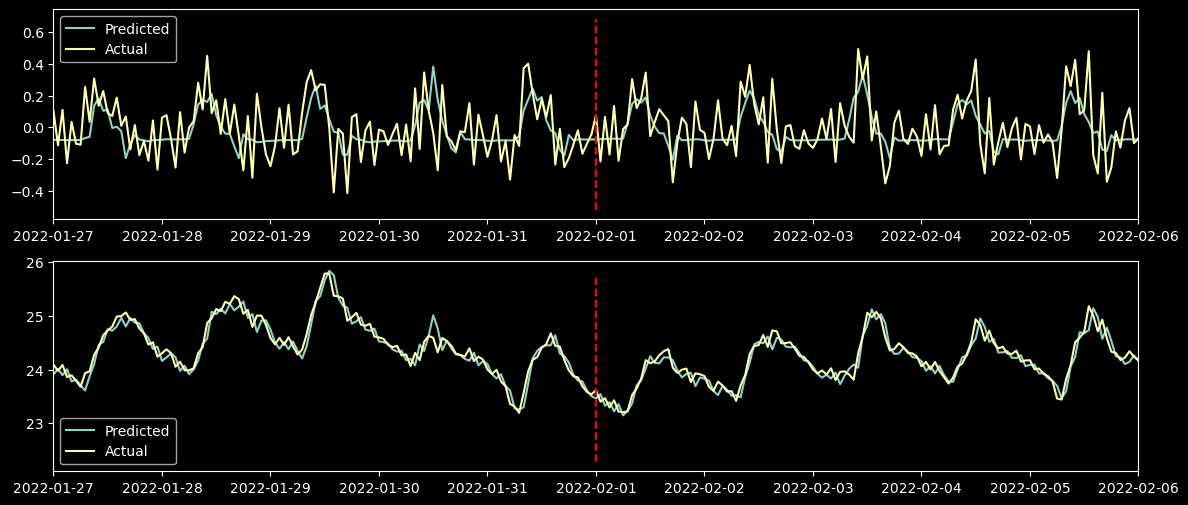

In [6]:
model_indoor = fit_and_test(MLPRegressor(
    hidden_layer_sizes=(32, 128, 512, 1024, 256), 
    activation='relu',
    learning_rate='constant',
    learning_rate_init=0.01,
    random_state=42,
    # verbose=True,
    shuffle=True,
), X_indoor, y_indoor)
model_indoor

(1178, 15) (717, 15)
train score:	 0.4315529054498056
test score:	 0.339425635757733

self RMSE:	 0.15640591250274757
pred RMSE:	 24.029892599031474
train RMSE:	 0.13901087626851996
test RMSE:	 0.140867453472456

self RMSE:	 0.15640591250274757
pred RMSE:	 0.12137753901522083
train RMSE:	 0.11895506417201018
test RMSE:	 0.1252526402692554



{'sec_supp_t': -0.07444055159138332,
 'sec_supp_t_60min': -0.045314504995962276,
 'sec_supp_t_120min': 0.05243474795818642,
 'sec_supp_t_180min': 0.061628440689561755,
 'sec_back_t': 0.22534704151943505,
 'sec_back_t_60min': -0.08008839688956233,
 'sec_back_t_120min': -0.13291682831719923,
 'irradiance': 0.0002443191582163287,
 'irradiance_60min': 0.0009139379793459274,
 'irradiance_120min': -0.0008375212893201381,
 'indoor_60min': -0.14980145541934775,
 'indoor_120min': 0.09215580396395018,
 'outdoor': 0.010937648783530698,
 'outdoor_60min': -0.0032757017040488793,
 'outdoor_120min': -0.0020584406003754086}

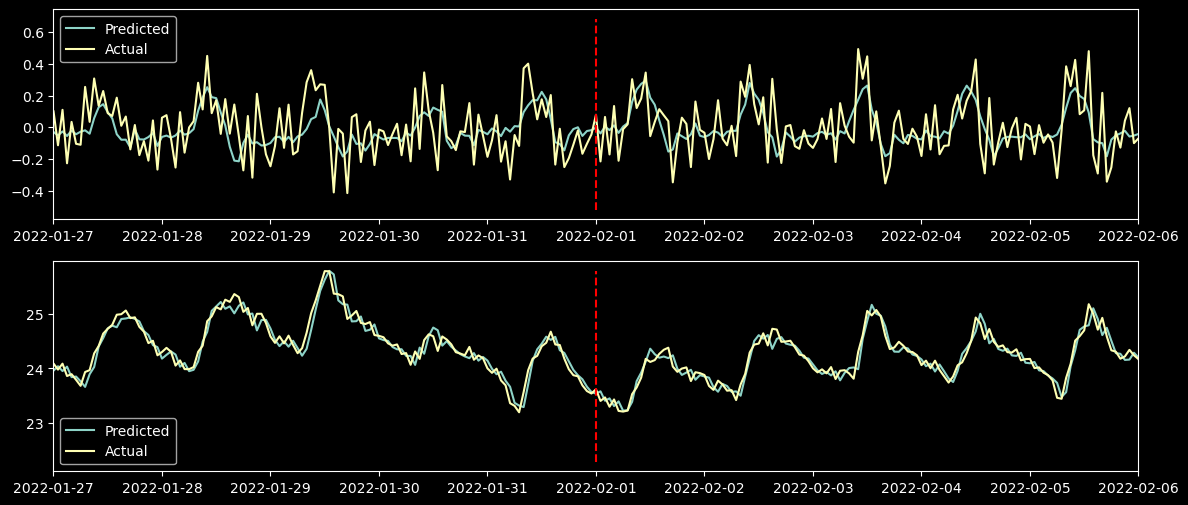

In [7]:
model_indoor = fit_and_test(LinearRegression(), X_indoor, y_indoor)

display(dict(zip(model_indoor.feature_names_in_, model_indoor.coef_)))
# significent = np.abs(model_indoor.coef_) > 1e-3
# display(dict(zip(model_indoor.feature_names_in_[significent], model_indoor.coef_[significent])))

(1178, 15) (717, 15)
train score:	 0.422691522990294
test score:	 0.3374398097669682

self RMSE:	 0.15640591250274757
pred RMSE:	 24.0293825003033
train RMSE:	 0.1374157425937652
test RMSE:	 0.1408953730837232

self RMSE:	 0.15640591250274757
pred RMSE:	 0.12201375422801268
train RMSE:	 0.1198780919813688
test RMSE:	 0.12544076692742082



/home/xusj/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.973e-01, tolerance: 2.930e-03
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.01, l1_ratio=0.01)

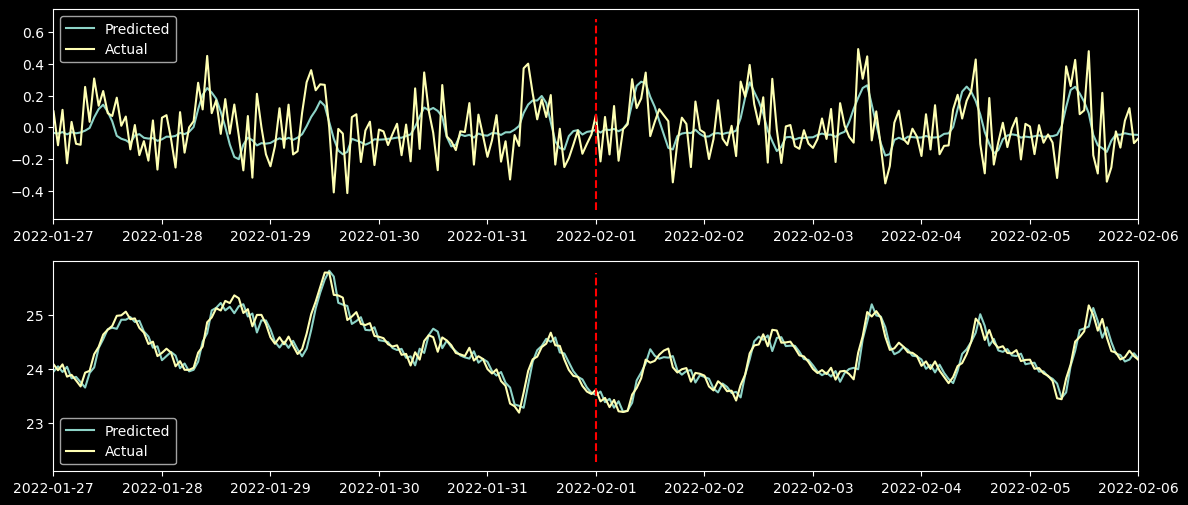

In [8]:
fit_and_test(ElasticNet(alpha=0.01, l1_ratio=0.01), X_indoor, y_indoor)

(1178, 15) (717, 15)
train score:	 0.5283039713745423
test score:	 0.2573095831406558

self RMSE:	 0.15640591250274757
pred RMSE:	 24.031742155091422
train RMSE:	 0.1411245604129894
test RMSE:	 0.14932069142411197

self RMSE:	 0.15640591250274757
pred RMSE:	 0.11821368387730836
train RMSE:	 0.10836273881200392
test RMSE:	 0.13280974465341921



KNeighborsRegressor()

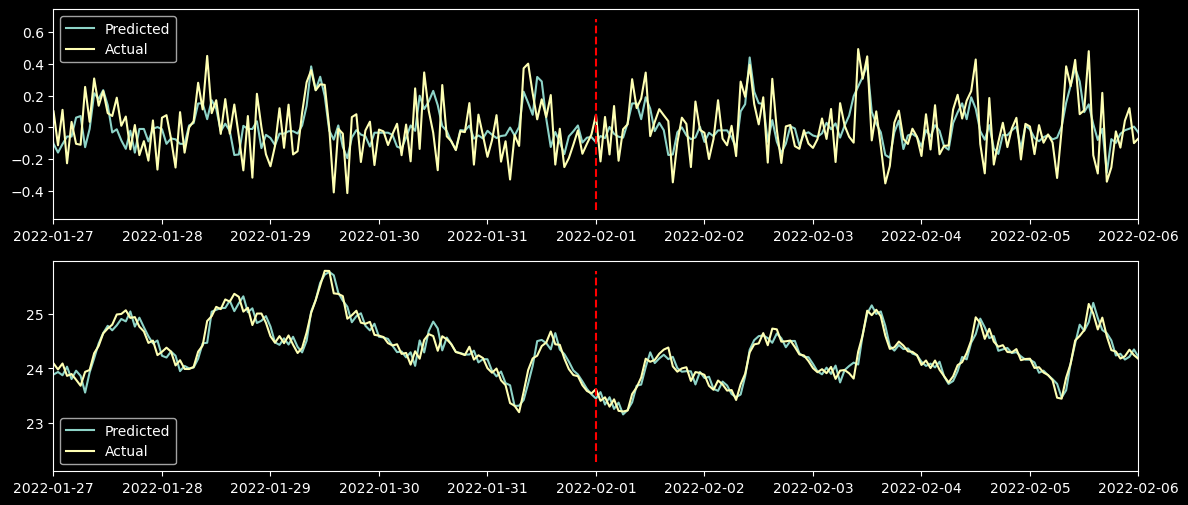

In [9]:
fit_and_test(KNeighborsRegressor(n_neighbors=5), X_indoor, y_indoor)

(1178, 15) (717, 15)
train score:	 0.463641765140937
test score:	 0.3470322240308358

self RMSE:	 0.15640591250274757
pred RMSE:	 24.031602388651898
train RMSE:	 0.13214240703225325
test RMSE:	 0.13650556149905163

self RMSE:	 0.15640591250274757
pred RMSE:	 0.11902709488544244
train RMSE:	 0.11554686830725049
test RMSE:	 0.12452940306484668



GradientBoostingRegressor(n_estimators=15)

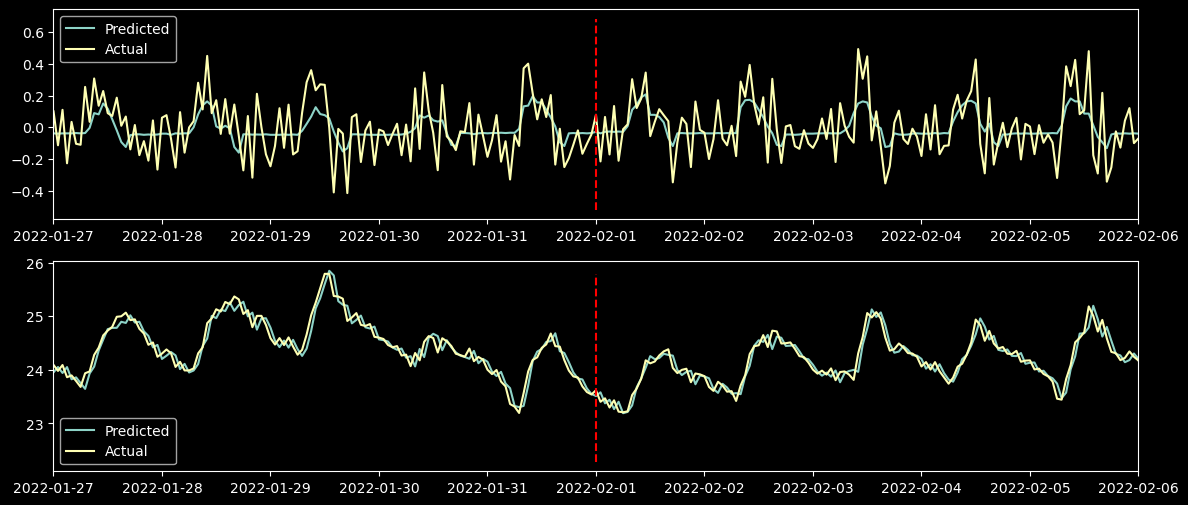

In [10]:
fit_and_test(GradientBoostingRegressor(n_estimators=15, learning_rate=0.1), X_indoor, y_indoor)

## Final

(1178, 15) (717, 15)
train score:	 0.4653507004926395
test score:	 0.39970532301358963

self RMSE:	 0.15640591250274757
pred RMSE:	 24.029734155016413
train RMSE:	 0.1354033222376331
test RMSE:	 0.1447287976689261

self RMSE:	 0.15640591250274757
pred RMSE:	 0.11690564863331133
train RMSE:	 0.11535903321974807
test RMSE:	 0.11940108625205795



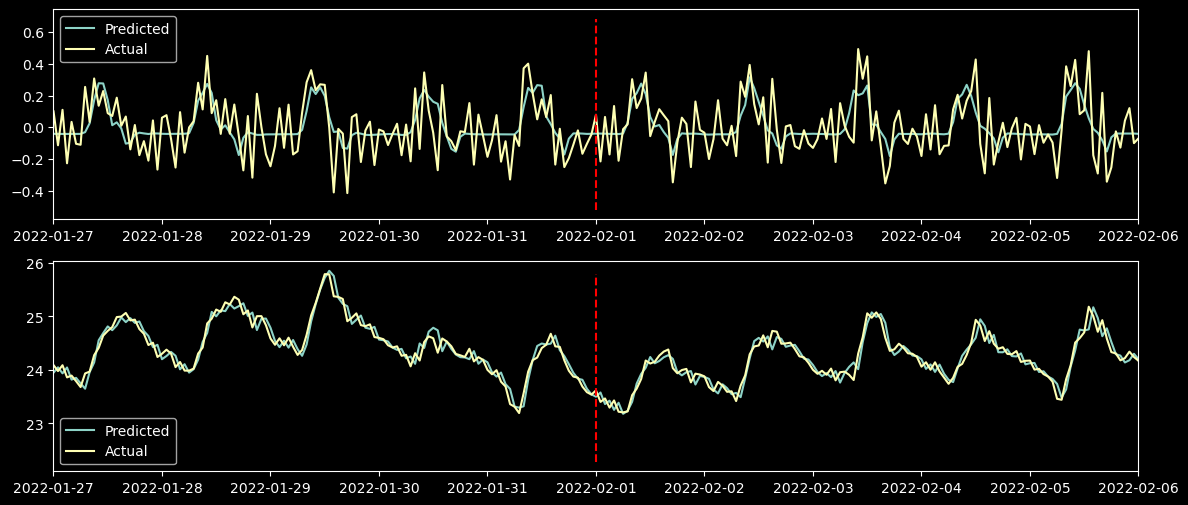

In [30]:
model_indoor = fit_and_test(SVR(kernel='rbf', C=10), X_indoor, y_indoor)

(1178, 16) (717, 16)
train score:	 0.927596459737688
test score:	 0.8983689789733685

self RMSE:	 0.23253296114668554
pred RMSE:	 35.80519652820871
train RMSE:	 0.252502828714787
test RMSE:	 0.2751509259196182

self RMSE:	 0.23253296114668554
pred RMSE:	 0.06797071064660971
train RMSE:	 0.05893492642182857
test RMSE:	 0.08063735806607429



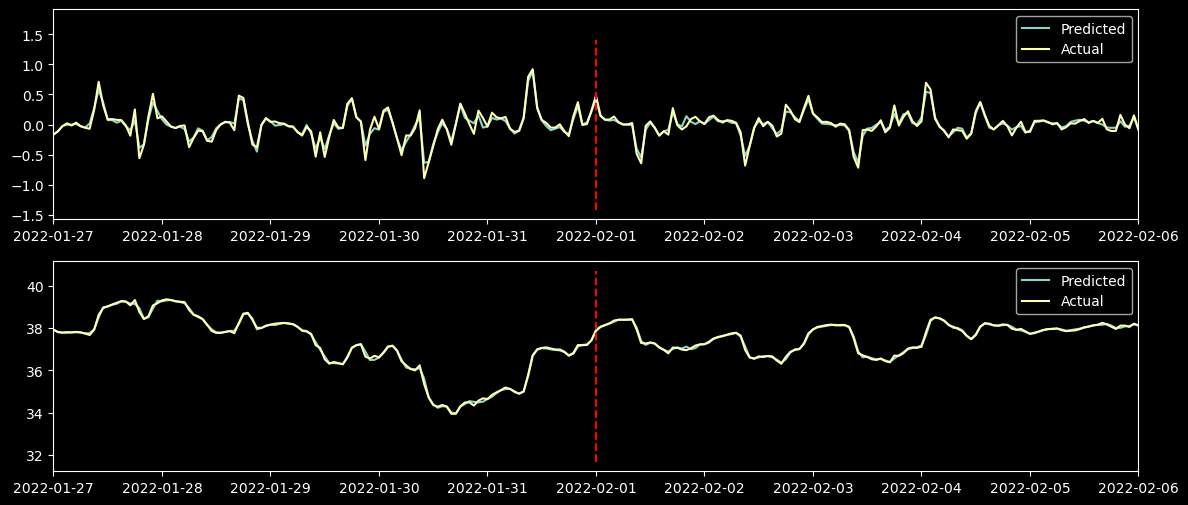

In [12]:
model_sec_back_t = fit_and_test(LinearRegression(), X_sec_back_t, y_sec_back_t)

In [32]:
model = fit(SVR(kernel='rbf', C=10), X_indoor, y_indoor)
nona = ~X_indoor.isna().any(axis=1) & ~y_indoor.diff().isna()
model.score(X_indoor[nona], y_indoor.diff()[nona])

0.4506652718620412

In [33]:
model = fit(LinearRegression(), X_sec_back_t, y_sec_back_t)
nona = ~X_sec_back_t.isna().any(axis=1) & ~y_sec_back_t.diff().isna()
model.score(X_sec_back_t[nona], y_sec_back_t.diff()[nona])

0.9153447019804695